In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-systems-coupledpendula)

Let's implement the coupled pendulums from {numref}`Example {number} <example-systems-coupledpendula>`. The pendulums will be pulled in opposite directions and then released together from rest.

In [2]:
def couple(t, u, params):
    gamma, L, k = params
    g = 9.8
    udot = copy(u)
    udot[:2] = u[2:4]
    udot[2] = -gamma * u[2] - (g / L) * sin(u[0]) + k * (u[1] - u[0])
    udot[3] = -gamma * u[3] - (g / L) * sin(u[1]) + k * (u[0] - u[1])
    return udot

u0 = array([1.25, -0.5, 0, 0])
tspan = [0.0, 50.0]

First we check the behavior of the system when the pendulums are uncoupled, i.e., when $k=0$.
```{tip}
:class: dropdown
We use a closure here to pass the fixed parameter values into `couple`.
```

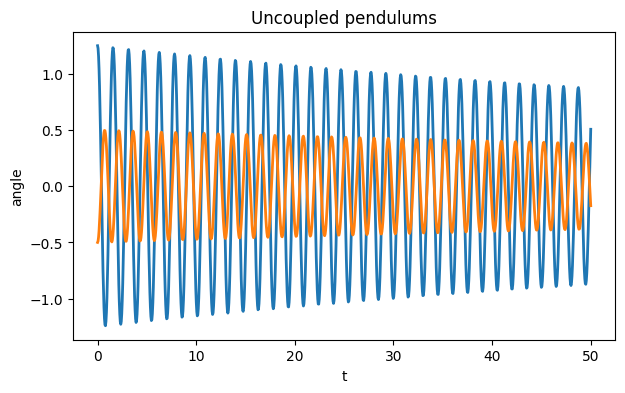

In [3]:
from scipy.integrate import solve_ivp
gamma, L, k = 0.01, 0.5, 0.0
du_dt = lambda t, u: couple(t, u, (gamma, L, k))
sol = solve_ivp(du_dt, tspan, u0, t_eval=linspace(0, 50, 1000))
plot(sol.t, sol.y[:2, :].T)    # first two components of solution
xlabel("t"), ylabel("angle")
title("Uncoupled pendulums");

You can see that the pendulums swing independently. Because the model is nonlinear and the initial angles are not small, they have slightly different periods of oscillation, and they go in and out of phase.

With coupling activated, a different behavior is seen.

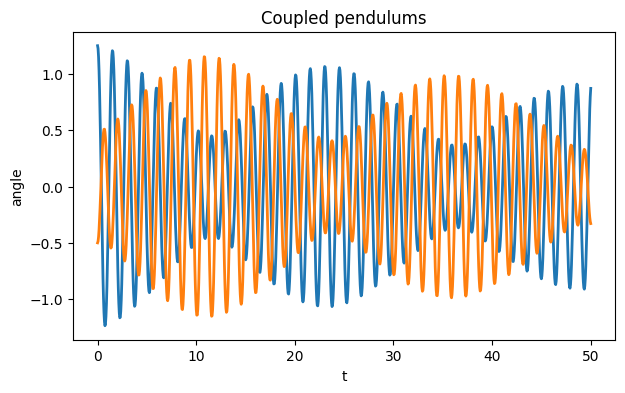

In [4]:
k = 0.75    # changes the value in the du_dt closure
sol = solve_ivp(du_dt, tspan, u0, t_eval=linspace(0, 50, 1000))
plot(sol.t, sol.y[:2, :].T)
xlabel("t"), ylabel("angle")
title("Coupled pendulums");

The coupling makes the pendulums swap energy back and forth.